In [1]:
from conjugate_gradient import ConjugateGradient

import theano.tensor as T
import numpy as np

from pymanopt import Problem 
from pymanopt.manifolds import Stiefel

import time

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
X = T.matrix()

times = []
# fix p
p = 5

for n in np.logspace(1, 4, 40):
    n = int(n)
    A = np.random.randn(n, n)
    A = 0.5 * (A + A.T)
    cost = T.dot(X.T, T.dot(A, X)).trace()
    
    # specify the manifold
    St = Stiefel(n, p)
    # define the problem
    problem = Problem(manifold=St, cost=cost, arg=X, verbosity=0)
    # pick a solver
    solver = ConjugateGradient(maxiter=1000, mingradnorm=1e-6)
    # solve
    Xopt = solver.solve(problem)
    t = time.time() - solver._time
    times.append(t)

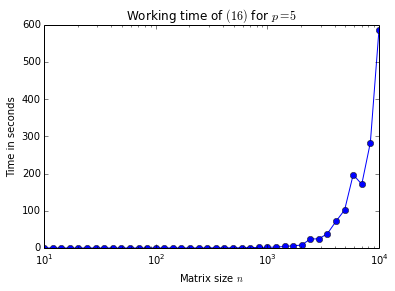

In [37]:
plt.plot(np.logspace(1, 4, 40), times[:40], '-o')
plt.xscale('log')
plt.xlabel(r'Matrix size $n$')
plt.ylabel('Time in seconds')
plt.title(r'Working time of $(16)$ for $p=5$')

In [ ]:
n = 1000

A = np.random.randn(n, n)
A = 0.5 * (A + A.T)
cost = T.dot(X.T, T.dot(A, X)).trace()

times_p = []
for p in np.linspace(3, 500, 20):
    p = int(p)
    
    # specify the manifold
    St = Stiefel(n, p)
    # define the problem
    problem = Problem(manifold=St, cost=cost, arg=X, verbosity=0)
    # pick a solver
    solver = ConjugateGradient(maxiter=1000, mingradnorm=1e-6)
    # solve
    Xopt = solver.solve(problem)
    t = time.time() - solver._time
    times_p.append(t)

In [ ]:
plt.plot(np.linspace(3, 500, 20), times_p, '-o')
plt.xlabel(r'Second dimension of $X$, $p$')
plt.ylabel('Time in seconds')
plt.title(r'Working time of $(16)$ for $n=1000$')

---

In [ ]:
true_val = sum(sorted(np.linalg.eig(A)[0])[:p])

In [ ]:
plt.plot(solver._cost, '-v')
plt.plot(solver._gradnorm, '-*')
plt.hlines(y=true_val, xmin=0, xmax=solver.iters + 1)